## RQ1

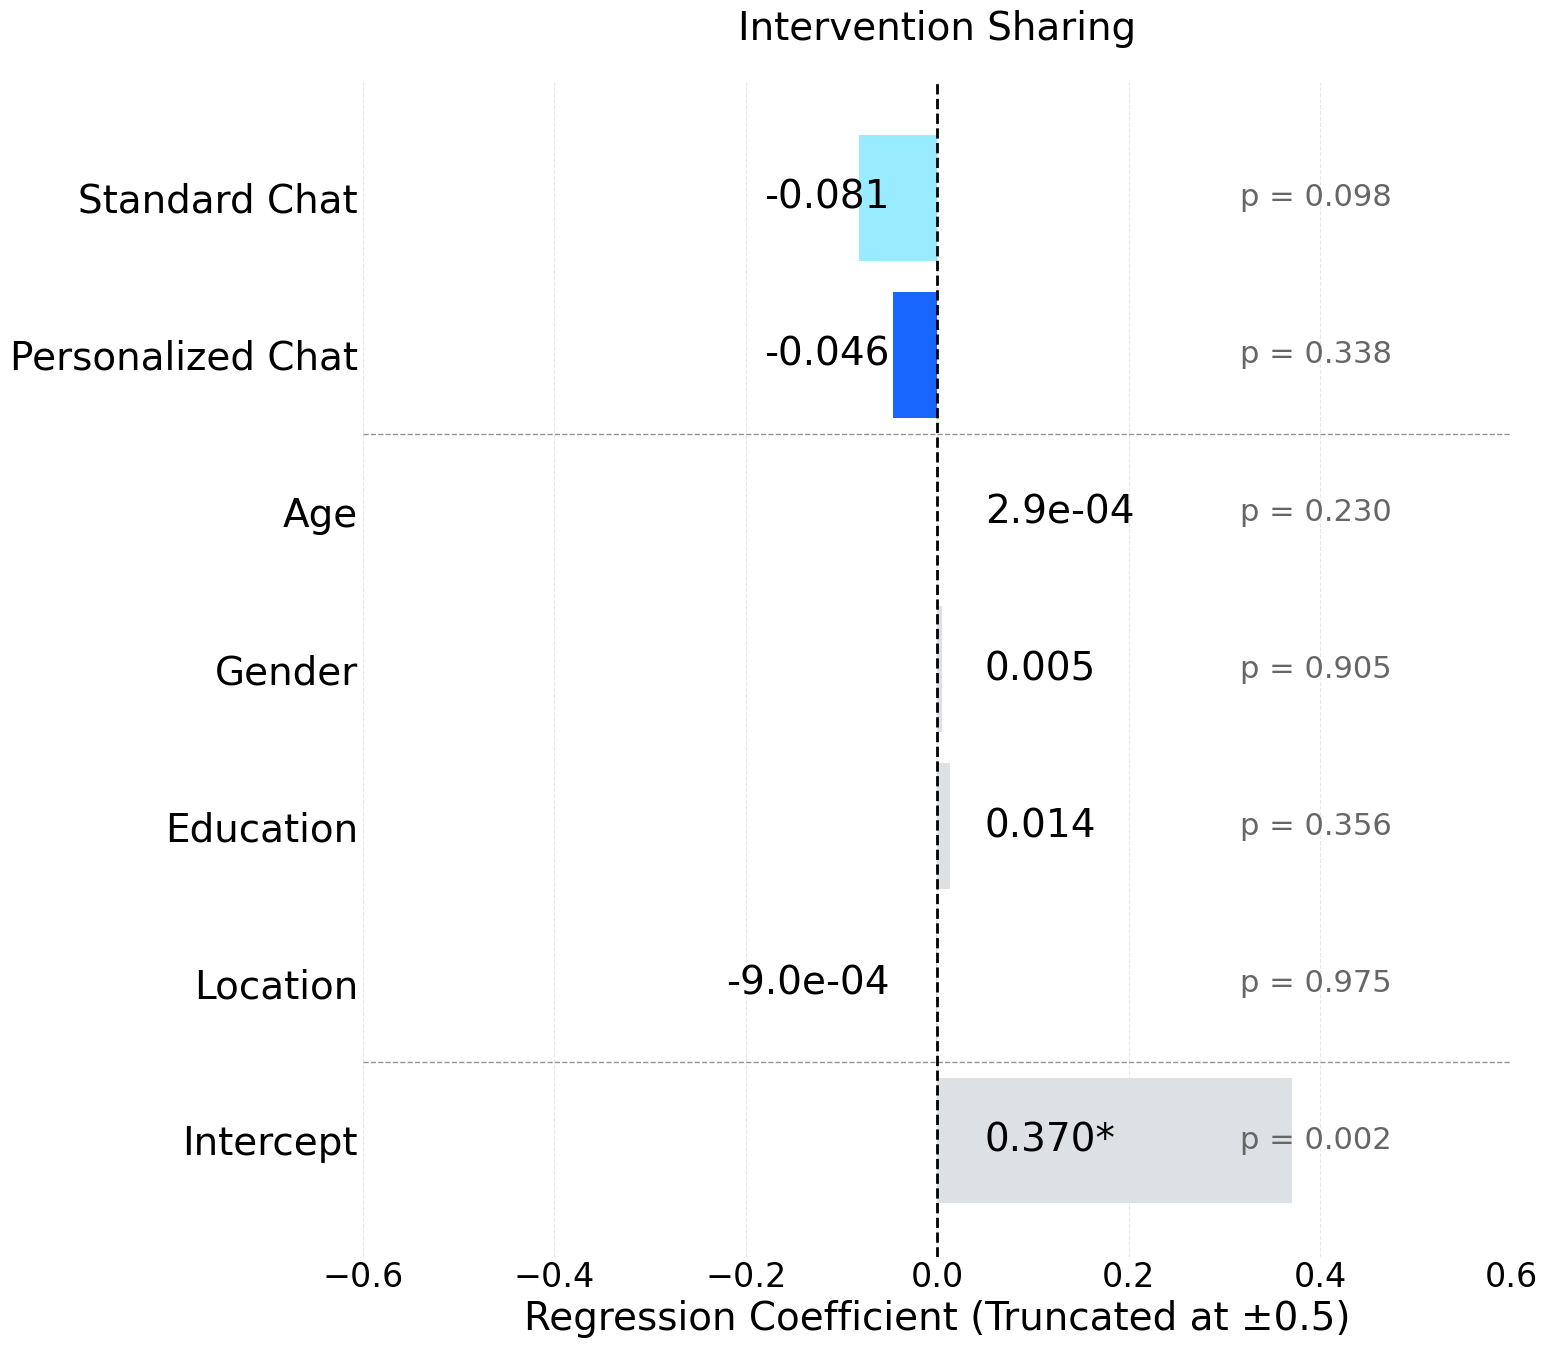

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ======== DATASET DEFINITIONS ========
datasets = {
    "Climate Change Belief Predictors": [
        ("Standard Chat", -0.1977092, 0.686, "#99ebff"),
        ("Personalized Chat", -0.1750725, 0.719, "#1966ff"),
        ("Climate Change Belief (pre)", 0.9907277, 0.000, "#dde1e6"),
        ("Age", -0.002252, 0.493, "#dde1e6"),
        ("Gender", -0.0385985, 0.921, "#dde1e6"),
        ("Education", 0.300785, 0.042, "#dde1e6"),
        ("Location", 0.505745, 0.089, "#dde1e6"),
        ("Intercept", -0.3685357, 0.751, "#dde1e6")
    ],
    "Psychological Distance Predictors": [
        ("Standard Chat", 0.0027708, 0.945, "#99ebff"),
        ("Personalized Chat", -0.001855, 0.963, "#1966ff"),
        ("Psychological Distance (pre)", 0.8468847, 0.000, "#dde1e6"),
        ("age", -0.0000302, 0.910, "#dde1e6"),
        ("Gender", -0.0228579, 0.470, "#dde1e6"),
        ("Education", 0.0113042, 0.349, "#dde1e6"),
        ("Location", 0.0619935, 0.010, "#dde1e6"),
        ("Intercept", 0.5975617, 0.000, "#dde1e6")
    ],
    "Policy Adoption Predictors": [
        ("Standard Chat", -0.0352266, 0.928, "#99ebff"),
        ("Personalized Chat", 0.0261536, 0.946, "#1966ff"),
        ("Policy Adoption (pre)", 0.9836375, 0.000, "#dde1e6"),
        ("age", 0.0028274, 0.277, "#dde1e6"),
        ("Gender", 0.4401079, 0.154, "#dde1e6"),
        ("Education", -0.1075894, 0.360, "#dde1e6"),
        ("Location", 0.5683226, 0.016, "#dde1e6"),
        ("Intercept", 1.094168, 0.244, "#dde1e6")
    ],
    "Self Perceived Behavior Predictors": [
        ("Standard Chat", 0.0324319, 0.166, "#99ebff"),
        ("Personalized Chat", 0.0114069, 0.624, "#1966ff"),
        ("Self Perceived Behavior (pre)", 0.9623818, 0.000, "#dde1e6"),
        ("age", -0.0004702, 0.003, "#dde1e6"),
        ("Gender", -0.0201738, 0.277, "#dde1e6"),
        ("Education", 0.0054388, 0.442, "#dde1e6"),
        ("Location", -0.0088836, 0.525, "#dde1e6"),
        ("Intercept", 0.1190356, 0.042, "#dde1e6")
    ],
    "Pro-Environmental Intentions": [
        ("Standard Chat", 0.0329281, 0.264, "#99ebff"),
        ("Personalized Chat", 0.0344872, 0.239, "#1966ff"),
        ("Intentions (pre)", 0.9634618, 0.000, "#dde1e6"),
        ("age", 0.0001757, 0.375, "#dde1e6"),
        ("Gender", 0.0265988, 0.260, "#dde1e6"),
        ("Education", 0.0024069, 0.787, "#dde1e6"),
        ("Location", 0.0061695, 0.727, "#dde1e6"),
        ("Intercept", 0.0583444, 0.461, "#dde1e6")
    ],
    "Sustainable Consumption": [
        ("Standard Chat", 0.0659604, 0.034, "#99ebff"),
        ("Personalized Chat", 0.03888, 0.209, "#1966ff"),
        ("Consumption (pre)", 0.9905953, 0.000, "#dde1e6"),
        ("age", -0.0002581, 0.218, "#dde1e6"),
        ("Gender", 0.0273036, 0.271, "#dde1e6"),
        ("Education", 0.0021328, 0.821, "#dde1e6"),
        ("Location", 0.0305225, 0.104, "#dde1e6"),
        ("Intercept", -0.0073446, 0.926, "#dde1e6")
    ],
    "Willingness to Share Information": [
        ("Standard Chat", -0.0045743, 0.767, "#99ebff"),
        ("Personalized Chat", -0.0110557, 0.475, "#1966ff"),
        ("Willingness to Share (pre)", 0.9183264, 0.000, "#dde1e6"),
        ("Age", 0.0000541, 0.583, "#dde1e6"),
        ("Gender", -0.0058671, 0.638, "#dde1e6"),
        ("Education", -0.0044222, 0.350, "#dde1e6"),
        ("Location", 0.0000312, 0.997, "#dde1e6"),
        ("Intercept", 0.0721349, 0.047, "#dde1e6")
    ],
    "Sustainable Choice Preferences": [
        ("Standard Chat", 0.0483541, 0.718, "#99ebff"),
        ("Personalized Chat", 0.203361, 0.127, "#1966ff"),
        ("Age", -0.0002573, 0.775, "#dde1e6"),
        ("Gender", 0.4534124, 0.000, "#dde1e6"),
        ("Education", 0.0034593, 0.932, "#dde1e6"),
        ("Location", 0.2583483, 0.001, "#dde1e6"),
        ("Intercept", 1.124957, 0.000, "#dde1e6")
    ],
    "Intervention Sharing": [
        ("Standard Chat", -0.0813926, 0.098, "#99ebff"),
        ("Personalized Chat", -0.0459295, 0.338, "#1966ff"),
        ("Age", 0.0002945, 0.230, "#dde1e6"),
        ("Gender", 0.0046256, 0.905, "#dde1e6"),
        ("Education", 0.0135052, 0.356, "#dde1e6"),
        ("Location", -0.0008997, 0.975, "#dde1e6"),
        ("Intercept", 0.37044, 0.002, "#dde1e6")
    ],
}



# ======== PLOTTING FUNCTION ========
def create_coefficient_plot(data, title, truncate_threshold=0.5):
    # Data Preparation
    df = pd.DataFrame(data, columns=["Variable", "Coefficient", "p_value", "Color"])
    df = df.iloc[::-1].reset_index(drop=True)  # Reverse order
    
    # Coefficient Truncation
    df["Coefficient_Truncated"] = np.where(
        abs(df["Coefficient"]) > truncate_threshold,
        np.sign(df["Coefficient"]) * truncate_threshold,
        df["Coefficient"]
    )
    
    # Plot Setup
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(figsize=(16, 14))
    y_pos = np.arange(len(df))
    bar_height = 0.8

    # Plot Bars
    bars = ax.barh(y_pos, df["Coefficient_Truncated"], height=bar_height, 
                   color=df["Color"], edgecolor='none', zorder=2)
    
    # Annotations
    for i, (coef, trunc_coef, p, var) in enumerate(zip(df["Coefficient"], 
                                                     df["Coefficient_Truncated"], 
                                                     df["p_value"], 
                                                     df["Variable"])):
        if not np.isnan(coef):
            # Effect Size Annotation
            if coef > 0:
                effect_x = 0.05
                ha = "left"
            else:
                effect_x = -0.05
                ha = "right"
            
            # Determine significance marker
            significance_marker = "*" if p < 0.05 else ""

            ax.text(effect_x, i, 
                f"{coef:.3f}{significance_marker}" if abs(coef) >= 0.001 else f"{coef:.1e}{significance_marker}",
                va="center", ha=ha, color="black", fontsize=28)

            # p-value Annotation
            p_text = "p < 0.001" if p < 0.001 else f"p = {p:.3f}"
            ax.text(truncate_threshold * 0.95, i, 
                    p_text, va="center", ha="right", color="#666666", fontsize=22)
    
    # Formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["Variable"], fontsize=28)
    ax.set_xlim(-truncate_threshold - 0.1, truncate_threshold + 0.1)
    ax.axvline(0, color="black", linestyle="--", linewidth=2)
    ax.set_xlabel("Regression Coefficient (Truncated at ±0.5)", fontsize=28)
    ax.set_title(title, fontsize=28, pad=30)
    
    # Add thin dividers
    ax.axhline(y=0.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=4.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars 
    # ax.axhline(y=5.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars

    # Cleanup
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    
    return fig

# ======== GENERATE ALL PLOTS ========
for plot_title, plot_data in datasets.items():
    fig = create_coefficient_plot(
        data=plot_data,
        title=plot_title,  # Use dictionary key as title
        truncate_threshold=0.5
    )
    plt.show()

## RQ2.1

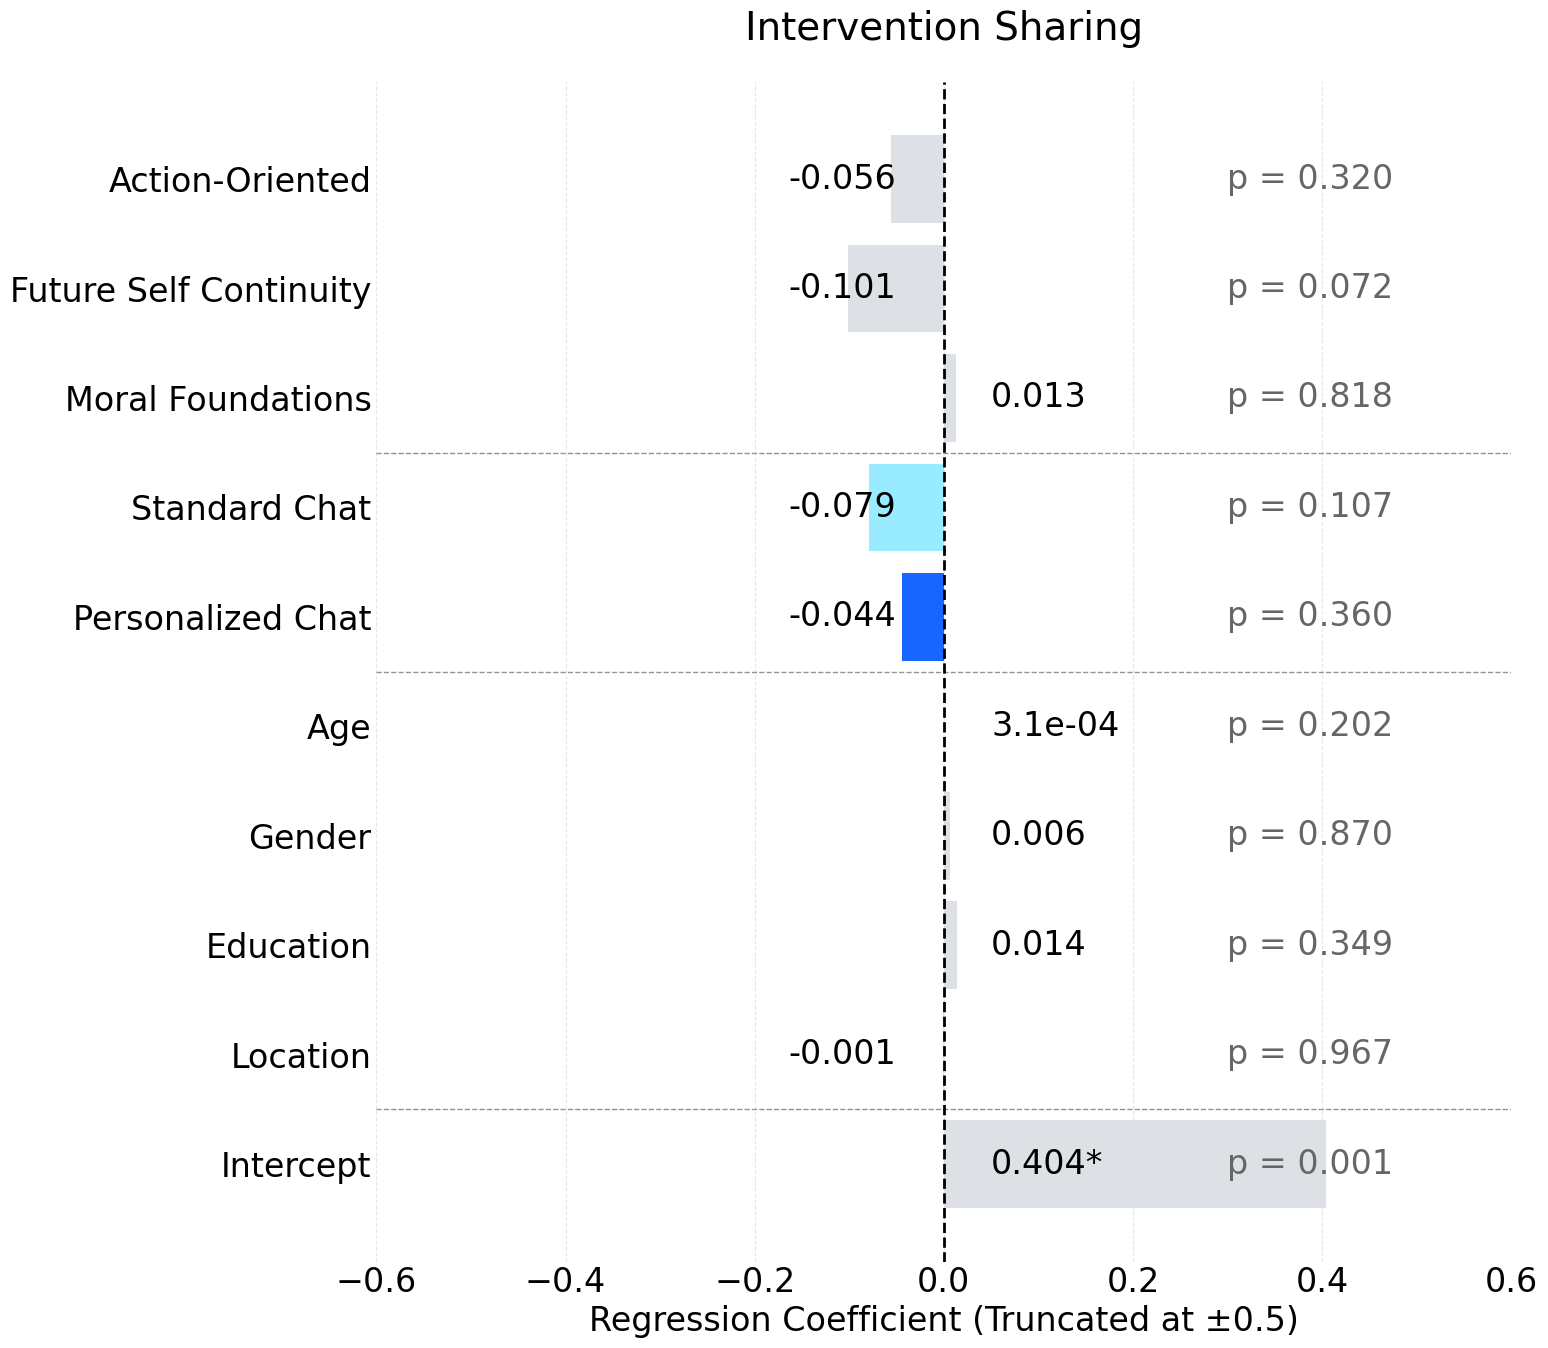

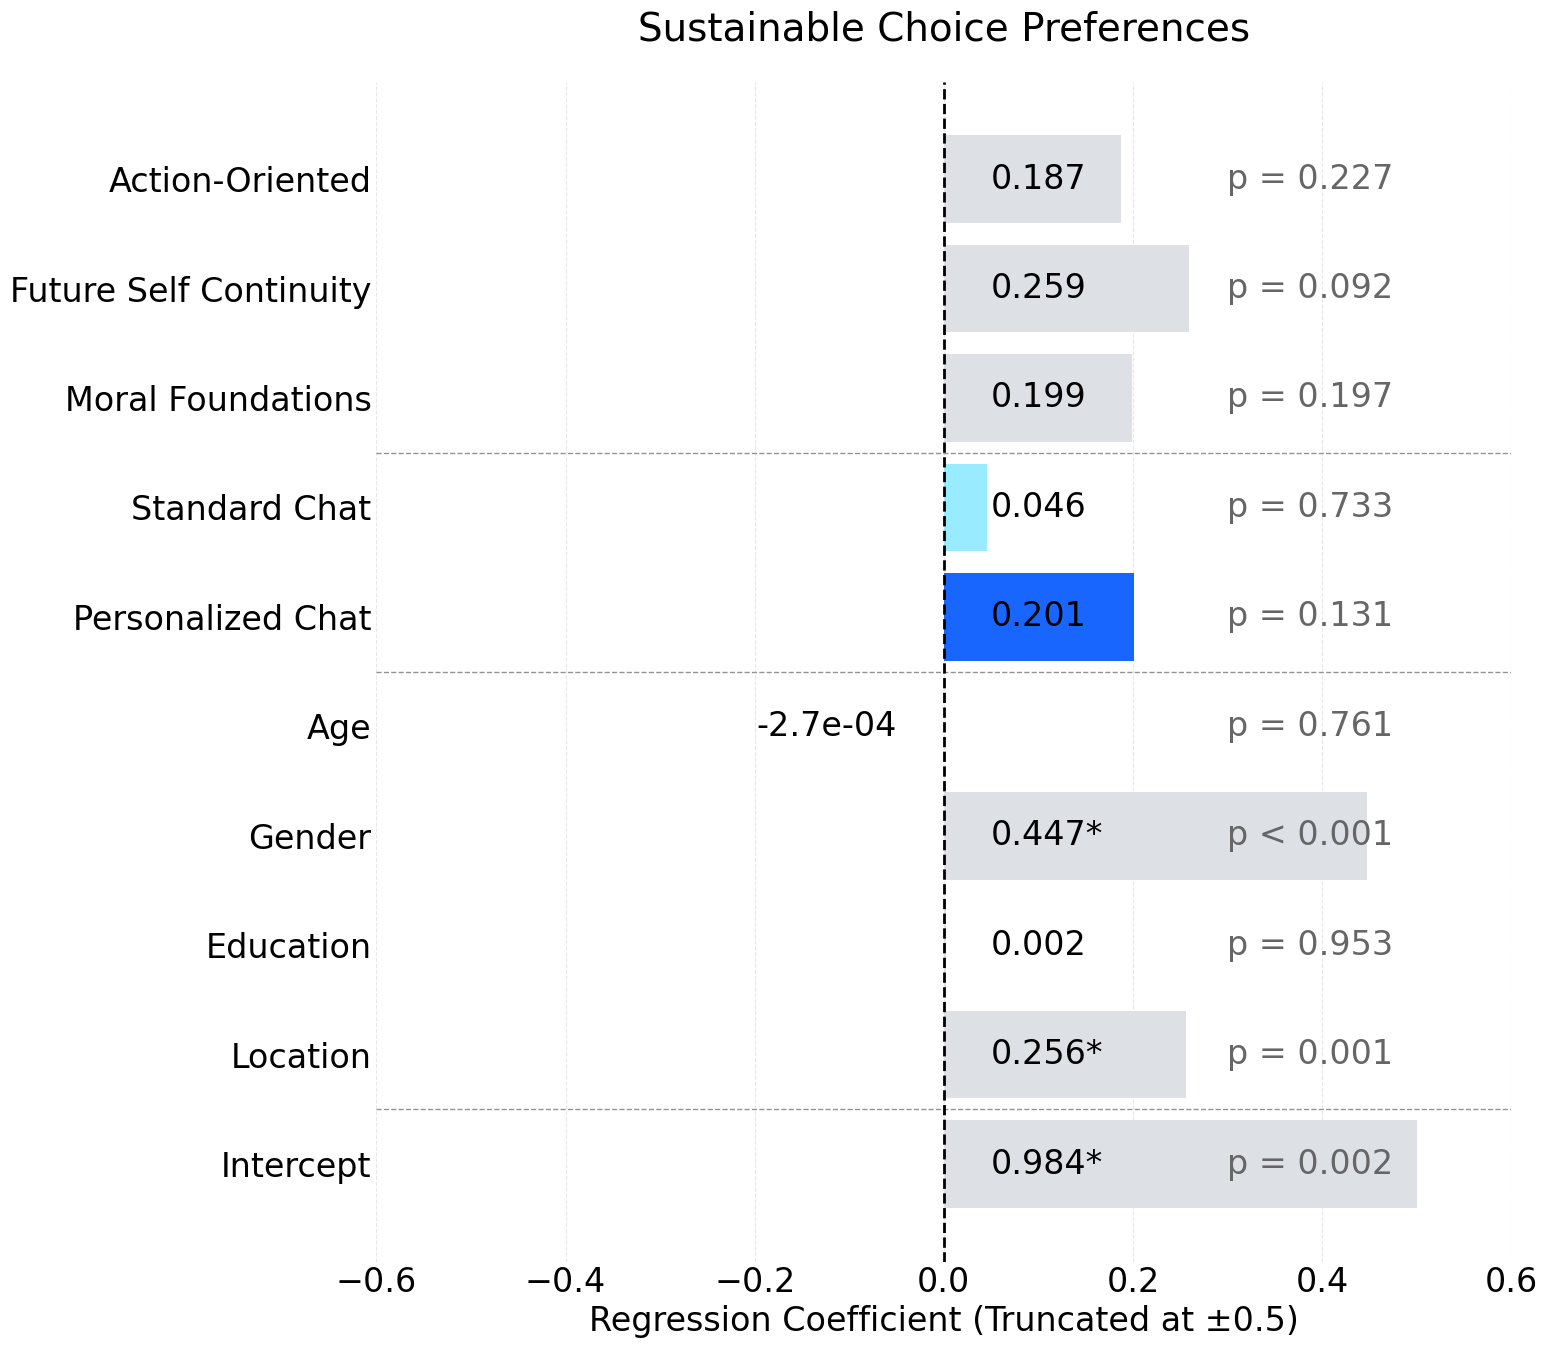

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ======== DATASET DEFINITIONS ========
datasets = {
    "Climate Change Belief Predictors": [
        ("Action-Oriented", 0.5135576, 0.363, "#dde1e6"),
        ("Future Self Continuity", 0.0401196, 0.943, "#dde1e6"),
        ("Moral Foundations", -0.1652122, 0.769, "#dde1e6"),
        ("Standard Chat", -0.1953807, 0.690, "#99ebff"),
        ("Personalized Chat", -0.1752543, 0.719, "#1966ff"),
        ("Climate Change Belief (pre)", 0.9904546, 0.000, "#dde1e6"),
        ("Age", -0.0024709, 0.453, "#dde1e6"),
        ("Gender", -0.0502148, 0.898, "#dde1e6"),
        ("Education", 0.3014093, 0.042, "#dde1e6"),
        ("Location", 0.4962911, 0.095, "#dde1e6"),
        ("Intercept", -0.4025737, 0.736, "#dde1e6")
    ],
    "Psychological Distance": [
        ("Action-Oriented", 0.0837146, 0.069, "#dde1e6"),
        ("Future Self Continuity", 0.0499838, 0.274, "#dde1e6"),
        ("Moral Foundations", 0.0875543, 0.057, "#dde1e6"),
        ("Standard Chat", 0.0024823, 0.950, "#99ebff"),
        ("Personalized Chat", -0.0018242, 0.963, "#1966ff"),
        ("Psychological Distance(pre)", 0.848274, 0.000, "#dde1e6"),
        ("Age", -0.0000426, 0.874, "#dde1e6"),
        ("Gender", -0.026213, 0.407, "#dde1e6"),
        ("Education", 0.0106751, 0.376, "#dde1e6"),
        ("Location", 0.0602852, 0.012, "#dde1e6"),
        ("Intercept", 0.5481201, 0.000, "#dde1e6")
    ],
    "Self Perceived Behavior Predictors": [
        ("Action-Oriented", -0.0025667, 0.924, "#dde1e6"),
        ("Future Self Continuity", -0.0486276, 0.070, "#dde1e6"),
        ("Moral Foundations", 0.0115561, 0.668, "#dde1e6"),
        ("Self Perceived Behavior (pre)", 0.9616185, 0.000, "#dde1e6"),
        ("Standard Chat", 0.0330644, 0.158, "#99ebff"),
        ("Personalized Chat", 0.0122117, 0.599, "#1966ff"),
        ("Age", -0.0004703, 0.003, "#dde1e6"),
        ("Gender", -0.0207947, 0.263, "#dde1e6"),
        ("Location", -0.0091722, 0.511, "#dde1e6"),
        ("Education", 0.0052971, 0.454, "#dde1e6"),
        ("Intercept", 0.1329212, 0.027, "#dde1e6")
    ],
    "Sustainable Consumption": [
        ("Action-Oriented", 0.0422787, 0.240, "#dde1e6"),
        ("Future Self Continuity", 0.0313153, 0.381, "#dde1e6"),
        ("Moral Foundations", 0.0128978, 0.720, "#dde1e6"),
        ("Standard Chat", 0.0657057, 0.035, "#99ebff"),
        ("Personalized Chat", 0.0385756, 0.213, "#1966ff"),
        ("Sustainable Consumption (pre)", 0.9902663, 0.000, "#dde1e6"),
        ("Age", -0.0002693, 0.199, "#dde1e6"),
        ("Gender", 0.026179, 0.292, "#dde1e6"),
        ("Education", 0.0020773, 0.826, "#dde1e6"),
        ("Location", 0.0298943, 0.112, "#dde1e6"),
        ("Intercept", -0.0234748, 0.772, "#dde1e6")
    ],
    "Willingness to Share Information": [
        ("Action-Oriented", 0.0086063, 0.627, "#dde1e6"),
        ("Future Self Continuity", -0.0059985, 0.739, "#dde1e6"),
        ("Moral Foundations", 0.0114284, 0.524, "#dde1e6"),
        ("Standard Chat", -0.0041833, 0.787, "#99ebff"),
        ("Personalized Chat", -0.0106581, 0.492, "#1966ff"),
        ("Willingness to Share (pre)", 0.9180461, 0.000, "#dde1e6"),
        ("Age", 0.0000531, 0.590, "#dde1e6"),
        ("Gender", -0.0062151, 0.618, "#dde1e6"),
        ("Education", -0.0045774, 0.334, "#dde1e6"),
        ("Location", -0.0000291, 0.997, "#dde1e6"),
        ("Intercept", 0.0697946, 0.064, "#dde1e6")
    ],
    "Policy Adoption Predictors": [
        ("Action-Oriented", -0.5900091, 0.187, "#dde1e6"),
        ("Future Self Continuity", -0.1392918, 0.753, "#dde1e6"),
        ("Moral Foundations", 0.1697682, 0.704, "#dde1e6"),
        ("Standard Chat", -0.0363007, 0.925, "#99ebff"),
        ("Personalized Chat", 0.0280078, 0.942, "#1966ff"),
        ("Policy Adoption (pre)", 0.9839809, 0.000, "#dde1e6"),
        ("Age", 0.0030694, 0.239, "#dde1e6"),
        ("Gender", 0.4535028, 0.142, "#dde1e6"),
        ("Education", -0.1085978, 0.355, "#dde1e6"),
        ("Location", 0.5785085, 0.015, "#dde1e6"),
        ("Intercept", 1.16264, 0.228, "#dde1e6")
    ],
    "Pro-Environmental Intentions": [
        ("Action-Oriented", 0.0646452, 0.057, "#dde1e6"),
        ("Future Self Continuity", 0.0904325, 0.007, "#dde1e6"),
        ("Moral Foundations", 0.0220642, 0.515, "#dde1e6"),
        ("Standard Chat", 0.0320312, 0.276, "#99ebff"),
        ("Personalized Chat", 0.033312, 0.255, "#1966ff"),
        ("Intentions (pre)", 0.9646633, 0.000, "#dde1e6"),
        ("Age", 0.0001613, 0.415, "#dde1e6"),
        ("Gender", 0.0248682, 0.292, "#dde1e6"),
        ("Education", 0.0023249, 0.794, "#dde1e6"),
        ("Location", 0.0052296, 0.767, "#dde1e6"),
        ("Intercept", 0.0158319, 0.845, "#dde1e6")
    ],
    "Intervention Sharing": [
        ("Action-Oriented", -0.05592, 0.320, "#dde1e6"),
        ("Future Self Continuity", -0.1012861, 0.072, "#dde1e6"),
        ("Moral Foundations", 0.0131964, 0.818, "#dde1e6"),
        ("Standard Chat", -0.0790707, 0.107, "#99ebff"),
        ("Personalized Chat", -0.0438432, 0.360, "#1966ff"),
        ("Age", 0.0003131, 0.202, "#dde1e6"),
        ("Gender", 0.0063765, 0.870, "#dde1e6"),
        ("Education", 0.0136745, 0.349, "#dde1e6"),
        ("Location", -0.0011582, 0.967, "#dde1e6"),
        ("Intercept", 0.4037048, 0.001, "#dde1e6")
    ],
    "Sustainable Choice Preferences": [
        ("Action-Oriented", 0.1869749, 0.227, "#dde1e6"),
        ("Future Self Continuity", 0.2590717, 0.092, "#dde1e6"),
        ("Moral Foundations", 0.1992136, 0.197, "#dde1e6"),
        ("Standard Chat", 0.0457152, 0.733, "#99ebff"),
        ("Personalized Chat", 0.2011482, 0.131, "#1966ff"),
        ("Age", -0.0002742, 0.761, "#dde1e6"),
        ("Gender", 0.4473435, 0.000, "#dde1e6"),
        ("Education", 0.0023832, 0.953, "#dde1e6"),
        ("Location", 0.2561926, 0.001, "#dde1e6"),
        ("Intercept", 0.9841706, 0.002, "#dde1e6")
    ],
}
    


# ======== PLOTTING FUNCTION ========
def create_coefficient_plot(data, title, truncate_threshold=0.5):
    # Data Preparation
    df = pd.DataFrame(data, columns=["Variable", "Coefficient", "p_value", "Color"])
    df = df.iloc[::-1].reset_index(drop=True)  # Reverse order
    
    # Coefficient Truncation
    df["Coefficient_Truncated"] = np.where(
        abs(df["Coefficient"]) > truncate_threshold,
        np.sign(df["Coefficient"]) * truncate_threshold,
        df["Coefficient"]
    )
    
    # Plot Setup
    plt.rcParams.update({'font.size': 24})
    fig, ax = plt.subplots(figsize=(16, 14))
    y_pos = np.arange(len(df))
    bar_height = 0.8

    # Plot Bars
    bars = ax.barh(y_pos, df["Coefficient_Truncated"], height=bar_height, 
                   color=df["Color"], edgecolor='none', zorder=2)
    
    # Annotations
    for i, (coef, trunc_coef, p, var) in enumerate(zip(df["Coefficient"], 
                                                     df["Coefficient_Truncated"], 
                                                     df["p_value"], 
                                                     df["Variable"])):
        if not np.isnan(coef):
            # Effect Size Annotation
            if coef > 0:
                effect_x = 0.05
                ha = "left"
            else:
                effect_x = -0.05
                ha = "right"
            
            # Determine significance marker
            significance_marker = "*" if p < 0.05 else ""

            ax.text(effect_x, i, 
                f"{coef:.3f}{significance_marker}" if abs(coef) >= 0.001 else f"{coef:.1e}{significance_marker}",
                va="center", ha=ha, color="black", fontsize=24)

            # p-value Annotation
            p_text = "p < 0.001" if p < 0.001 else f"p = {p:.3f}"
            ax.text(truncate_threshold * 0.95, i, 
                    p_text, va="center", ha="right", color="#666666", fontsize=24)
    
    # Formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df["Variable"], fontsize=24)
    ax.set_xlim(-truncate_threshold - 0.1, truncate_threshold + 0.1)
    ax.axvline(0, color="black", linestyle="--", linewidth=2)
    ax.set_xlabel("Regression Coefficient (Truncated at ±0.5)", fontsize=24)
    ax.set_title(title, fontsize=28, pad=30)
    
    # Add thin dividers
    ax.axhline(y=0.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    # ax.axhline(y=4.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=4.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After first 2 vars
    ax.axhline(y=6.5, color='#666666', linestyle='--', linewidth=1, zorder=1, alpha=0.7)  # After fifth var
 
    # Cleanup
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    plt.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    
    return fig

# ======== GENERATE ALL PLOTS ========
for plot_title, plot_data in datasets.items():
    fig = create_coefficient_plot(
        data=plot_data,
        title=plot_title,  # Use dictionary key as title
        truncate_threshold=0.5
    )
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7b862013-4237-4ea9-a21b-a061db5086ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>